Datatrained
Evaluation Project - 6
Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
loandata=pd.read_csv('loanapproval.csv')

In [5]:
df=pd.DataFrame(loandata)
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

The dataset has 614 rows and 13 columns



In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

in this we observe that 8 columns are object type, 1 column is interger and 4 columns have float type data

In [8]:
# check for the column heading
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# check for the loan status
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

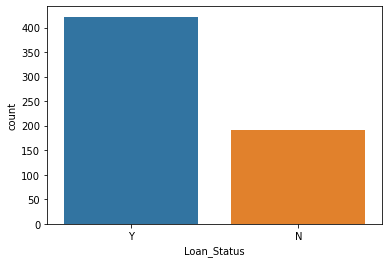

In [10]:
#plot on loan status
sns.countplot(df['Loan_Status'])


in this Ouput variable is "Loan_Status" and it has 2 instances 'N' and 'Y', the count of 'Y' in the dataset is 422 and 'N' is 192 approximately



In [11]:
#check for unique column
df['Loan_ID'].unique


<bound method Series.unique of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>

The data has the column 'Loan_ID' which is unique ID for each customer, so the column has 614 unique IDs



<AxesSubplot:xlabel='Married', ylabel='count'>

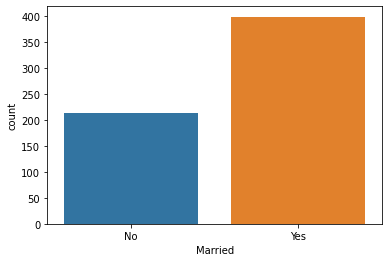

In [12]:
sns.countplot(df['Married'])


In [13]:
df['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

From the above data and plot it is clear that 398 applicants are married and only 213 applicants ae unmarried



<AxesSubplot:xlabel='Dependents', ylabel='count'>

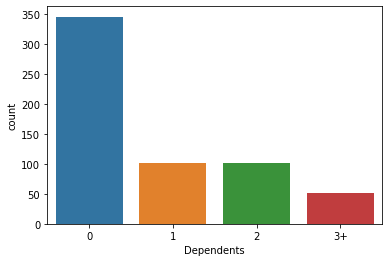

In [15]:
sns.countplot(df['Dependents'])


In [14]:

#check for the dependents
df['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

This variable we observe how many dependents the applicants have, the data in this is catogorized into 4 categories (0,1,2,3+), 345 applicants have 0 dependents and only 51 applicants have 3+ dependents, the same is represented visually in the above plot



<AxesSubplot:xlabel='Education', ylabel='count'>

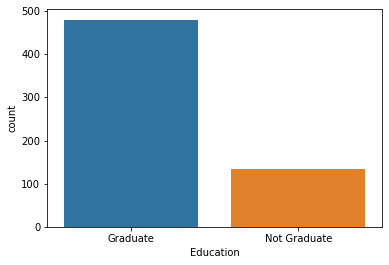

In [16]:
sns.countplot(df['Education'])


This column gives use details about education background of the applicants, from the above plot we can observe that 450+ applicants are graduates and just 100+ applicants are not graduate



<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

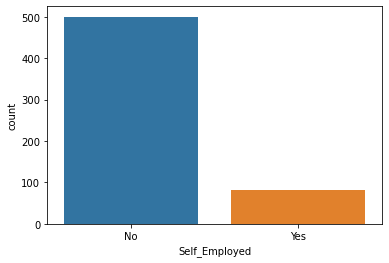

In [18]:
sns.countplot(df['Self_Employed'])


This column gives use update on whether the applicant is self employed or not, from the above plot we can observe that very less (<100) applicant are self employed and near 500 applicants are not self employed



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

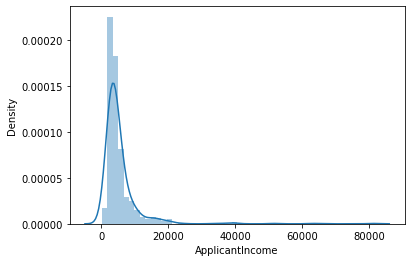

In [19]:
sns.distplot(df['ApplicantIncome'])


the above plot tells us about the income of applicants most of the applicants income lies between 100 to 20000 which we can observe from above plot



<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

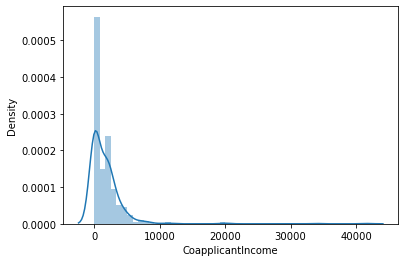

In [20]:
sns.distplot(df['CoapplicantIncome'])


the pplot tells us about income of the coapplicants, we can observe that most of the coapplicants income is 0 and the coapplicants income ranges to 10000 from 0



<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

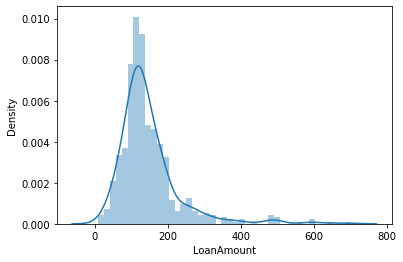

In [21]:
sns.distplot(df['LoanAmount'])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

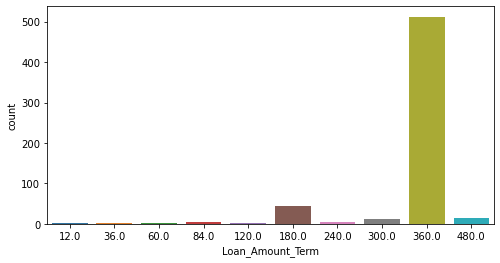

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(df['Loan_Amount_Term'])


The plot tells us about how many months tenur applicants have chosen to clear the loan, We can observe that 500+ applicants have opted for 360 months tenur



<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

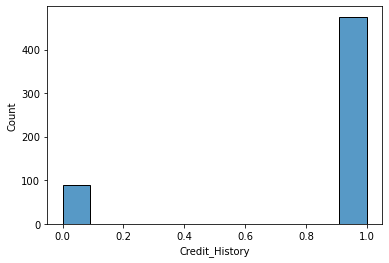

In [23]:
sns.histplot(df['Credit_History'])


observation on this data tells us about whether the applicants Credict history, the data tells only if the history is good or bad with binary inputs (1 and 0), we can also observe that 500 and above candidates credit history is good



<AxesSubplot:xlabel='Property_Area', ylabel='count'>

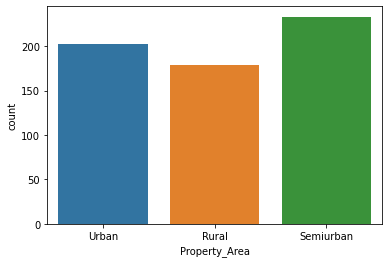

In [24]:
sns.countplot(df['Property_Area'])


by this observation column tells us about the area where the applicants property is situated, It has 3 categories - Urban, Rural and semiurban, maximum number of applicants own the properties in Semiurban area

Let us just encode 'Loan_Status' column so that it will be easy to study the relationship between the output and input variables



In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [26]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

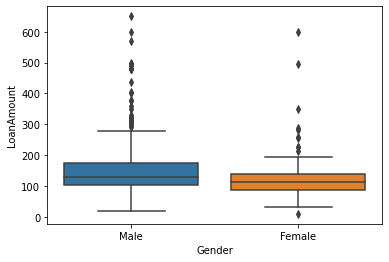

In [27]:
sns.boxplot(y='LoanAmount', x='Gender', data=df)


We can see the relatioship between Loan amount and Gender, We can see that Male applicants have applied for higher loan amount than Females



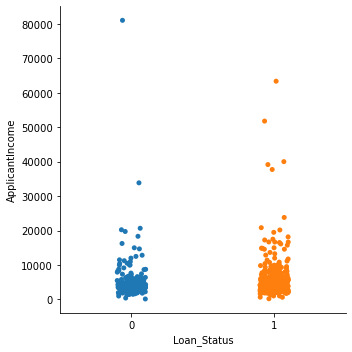

In [28]:
sns.catplot(y='ApplicantIncome', x='Loan_Status', data=df)


we can see that Loan is been approved for those who have income from 0 to 60,000, application is rejected for the applicant with 80,000 income with, The rejection could be dependent on som eother criterias in this case



<Figure size 720x360 with 0 Axes>

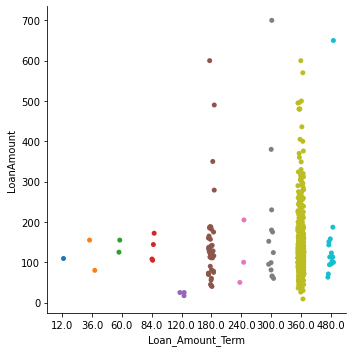

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(y='LoanAmount', x='Loan_Amount_Term', data=df)


We can observe the relation between Loan amount and loan amount term in the above plot, Most of the applicant opted for 180 and 360 months term to clear the loan and the loan amount for these terms ranges till 600



<AxesSubplot:xlabel='LoanAmount', ylabel='Self_Employed'>

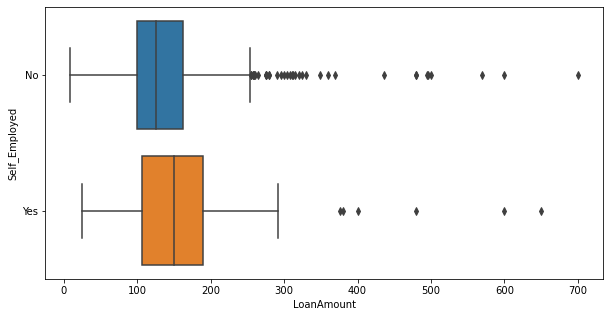

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Self_Employed', x='LoanAmount', data=df)


We can observe the relation of LOan amount with Sel employed in the above plot, For those applicants who are self employed the loan amount ranges from 10 to 650



In [31]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

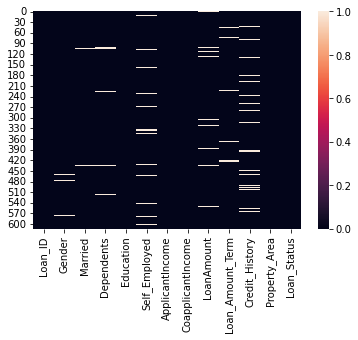

In [32]:
sns.heatmap(df.isnull())


We can observe that there are missing values present in the columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History



In [33]:
#Since the Loan ID column has nothing to do with output variable, we can drop this column

df.drop(['Loan_ID'],axis=1,inplace=True)
df.shape


(614, 12)

In [34]:
Obj_columns=df.select_dtypes(include=[object])
Obj_columns


,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [35]:
Obj_columns.isnull().sum()


Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [36]:
Obj_columns.drop(['Education','Property_Area'],axis=1,inplace=True)
Obj_columns.shape


(614, 4)

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
for col in Obj_columns:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1,1))


In [39]:
Fcolumns=['LoanAmount','Loan_Amount_Term','Credit_History']
Simputer = SimpleImputer(missing_values=np.nan,strategy='mean')
for col in Fcolumns:
    df[col]=Simputer.fit_transform(df[col].values.reshape(-1,1))


In [40]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here all the missing values are removed from the data set



In [41]:
# Encoding the columns that has object dtype
Object_columns=df.select_dtypes(include=[object])
Object_columns.head(1)


,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [43]:
for columns in Object_columns:
    df[columns] = le.fit_transform(df[columns])


In [44]:
df.dtypes


Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

here all the columns are integer and float values.

In [45]:
df.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observations :

* Mean is greater than median in ApplicantIncome, CoapplicantIncome, LoanAmount there is skewness present in these columns
* We can observe that outliers are present in the columns ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term since there is a high gap between 75th percentile and max
* There is a high dufference between mean and std in the columns ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term, hence the data is highly spreaded


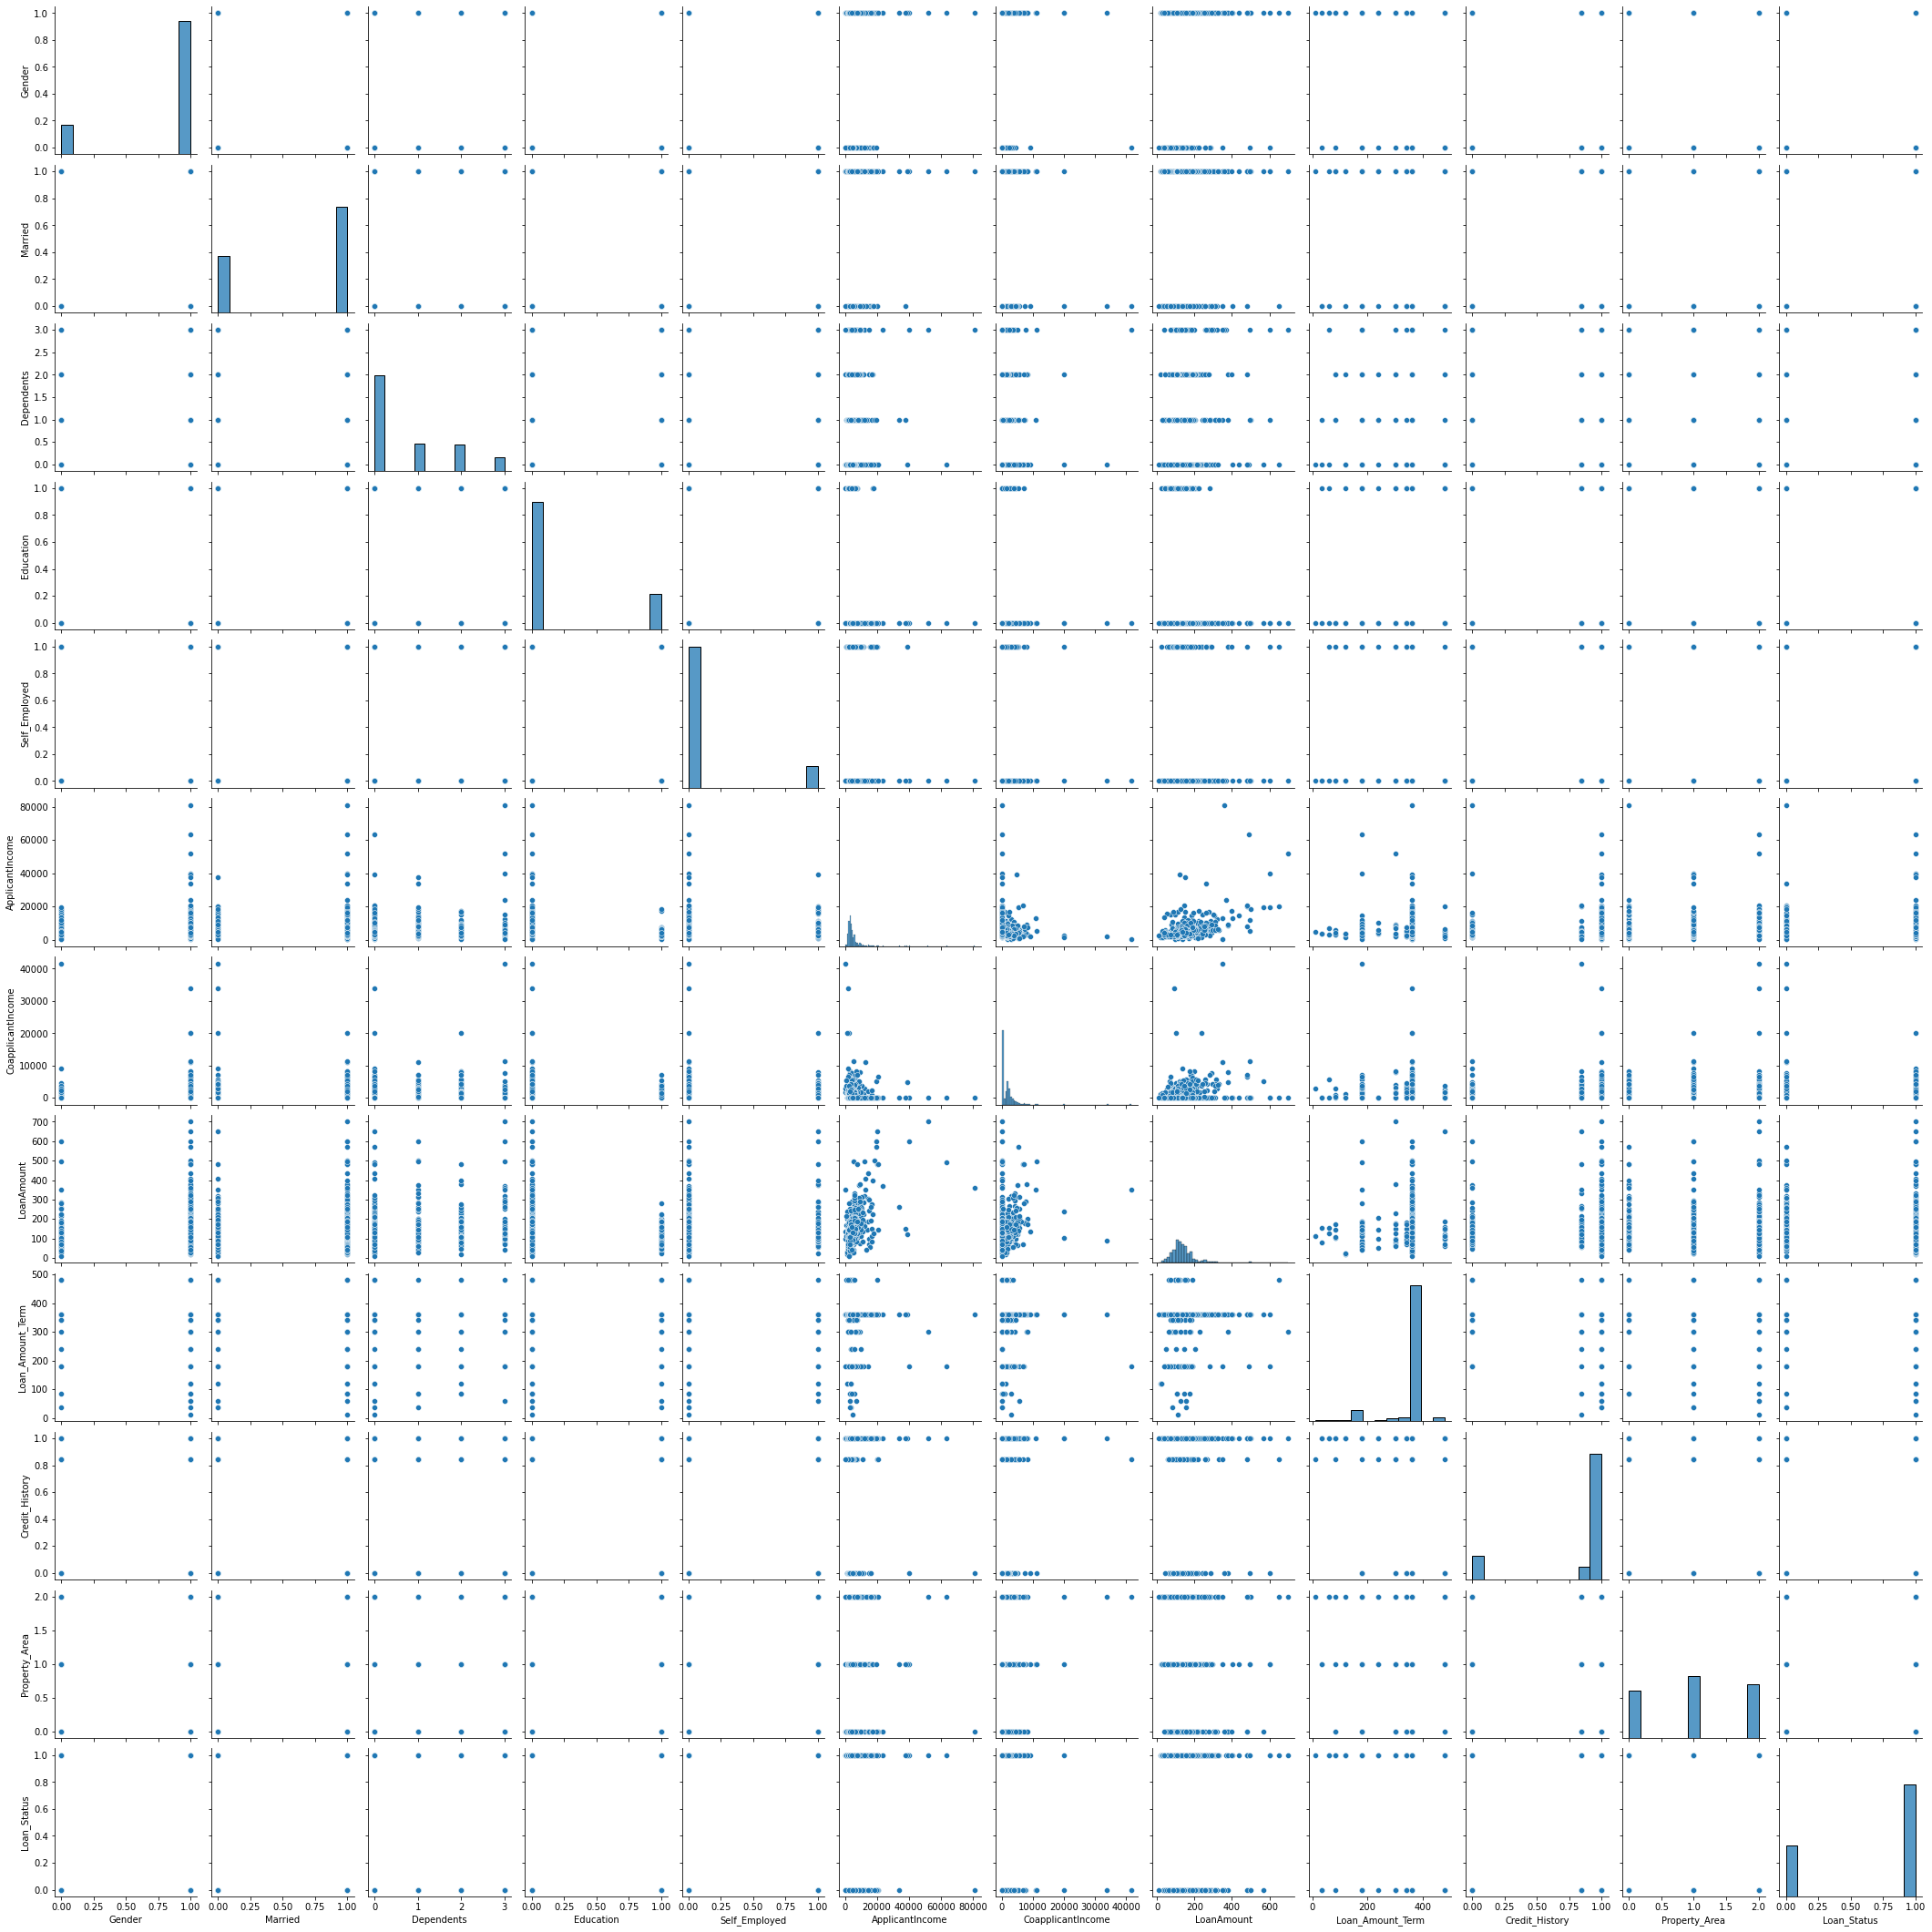

In [46]:
sns.pairplot(df)


The above plot shows the relation of each variable with all other variables



In [47]:
df.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

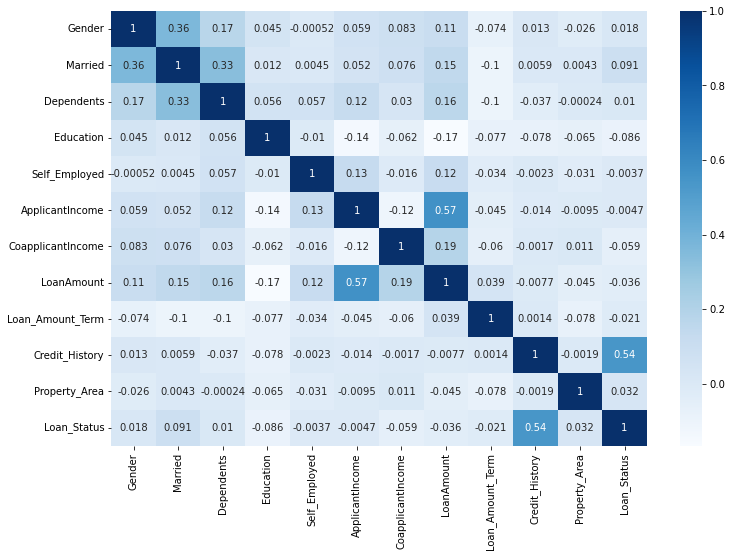

In [48]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)


Observations :

Loan Status has good correlation (0.54) with Credit_History

Loan Status has negative correlation with Loan_Amount_Term, LoanAmount, ApplicantIncome, CoapplicantIncome and Education

ApplicantIncome and LoanAmount has a good correlation of 0.57

Gender and Married variables have good correlation

Married and Dependents variables have good correlation


Gender                  AxesSubplot(0.125,0.772143;0.227941x0.107857)
Married              AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Dependents           AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Education               AxesSubplot(0.125,0.642714;0.227941x0.107857)
Self_Employed        AxesSubplot(0.398529,0.642714;0.227941x0.107857)
ApplicantIncome      AxesSubplot(0.672059,0.642714;0.227941x0.107857)
CoapplicantIncome       AxesSubplot(0.125,0.513286;0.227941x0.107857)
LoanAmount           AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Loan_Amount_Term     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Credit_History          AxesSubplot(0.125,0.383857;0.227941x0.107857)
Property_Area        AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Loan_Status          AxesSubplot(0.672059,0.383857;0.227941x0.107857)
dtype: object

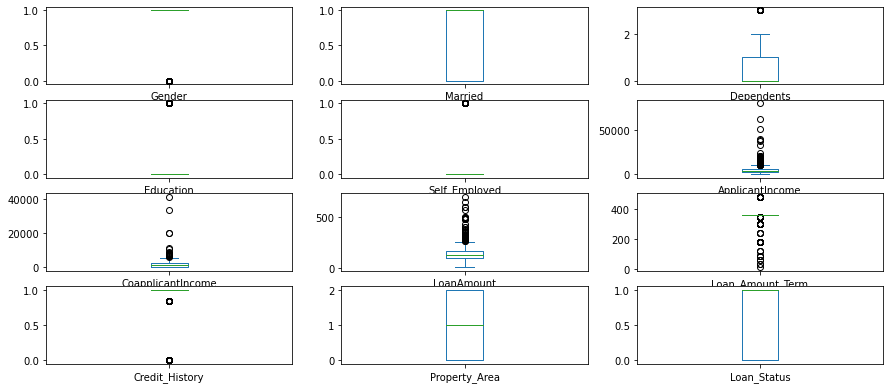

In [49]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,10))


We can observe that the columns ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term columns has outliers



In [50]:
outliers_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for col in outliers_col:
    from scipy.stats import zscore
    z=np.abs(zscore(df[col]))


In [51]:
Threshold=3
print(np.where(z>3))


(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64),)


In [52]:
df_new=df[(z<3)]
df_new


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [53]:
df.shape


(614, 12)

In [54]:
df_new.shape


(602, 12)

The old dataset has 614 rows and 12 columns

After removing outliers the new dataset has 602 rows and 12 columns



In [55]:
# Now we can check for data loss

Dataloss = (((614-602)/614)*100)
Dataloss


1.9543973941368076

We can observe that dataloss in zscore method after removing outliers of 1.9% which is less than 10%



In [56]:
df_new.skew()


Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      6.483905
CoapplicantIncome    7.487514
LoanAmount           2.739558
Loan_Amount_Term    -2.039751
Credit_History      -1.933422
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

the skewness is removed from the dataset now

In [58]:
#We can now check for multicolinearity
x=df_new.drop(['Loan_Status'],axis=1)
x.sample()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
596,1,1,2,1,1,6383,1000.0,187.0,360.0,1.0,0


In [59]:
y=df_new['Loan_Status']
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 602, dtype: int32

In [60]:
y.shape,x.shape


((602,), (602, 11))

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [62]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)



In [63]:
vif_calc()

    VIF Factor           Features
0     6.098495             Gender
1     3.653193            Married
2     1.777574         Dependents
3     1.308486          Education
4     1.176008      Self_Employed
5     2.884373    ApplicantIncome
6     1.475931  CoapplicantIncome
7     6.885432         LoanAmount
8    11.738416   Loan_Amount_Term
9     6.254362     Credit_History
10    2.597193      Property_Area


here wecan observe there is no multicolinearity present in the data

In [64]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((451, 11), (151, 11), (451,), (151,))

In [66]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()


In [67]:
model=[lg,gnb,svc,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')


Accuracy score of  LogisticRegression() is : 
0.8079470198675497
[[ 17  29]
 [  0 105]]
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        46
           1       0.78      1.00      0.88       105

    accuracy                           0.81       151
   macro avg       0.89      0.68      0.71       151
weighted avg       0.85      0.81      0.78       151



Accuracy score of  GaussianNB() is : 
0.8013245033112583
[[ 19  27]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        46
           1       0.79      0.97      0.87       105

    accuracy                           0.80       151
   macro avg       0.83      0.69      0.72       151
weighted avg       0.81      0.80      0.78       151



Accuracy score of  SVC() is : 
0.695364238410596
[[  0  46]
 [  0 105]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    

From the above metrix we can observe that the models GaussianNB(), SVC() and RandomForestClassifier() are giving similar accuracy scores of 81.4%, we can choose these to be best models at this stage



In [68]:
from sklearn.model_selection import cross_val_score


In [70]:
model1=[gnb,svc,rf]
for m in model1:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score*100)
    print(score.mean()*100)
    print(score.std()*100)
    print('\n')



Score of :  GaussianNB()
[79.12087912 74.44444444 76.66666667 81.11111111 86.66666667]
79.6019536019536
4.186525285550585


Score of :  SVC()
[68.13186813 67.77777778 67.77777778 68.88888889 68.88888889]
68.29304029304029
0.5033961627099853


Score of :  RandomForestClassifier()
[79.12087912 75.55555556 78.88888889 81.11111111 83.33333333]
79.6019536019536
2.581239321661248




With CV we can see that GaussianNB() and RandomForestClassifier()

are giving 79.0%when compared SVC

In [71]:
# Parameter tuning for GaussianNB()

from sklearn.model_selection import GridSearchCV


In [72]:
GNB=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grd1=GridSearchCV(estimator=GNB,param_grid=params_NB,cv=5)


In [73]:
grd1.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [74]:
grd1.best_score_


0.7960195360195359

In [75]:
grd1.best_params_


{'var_smoothing': 1.873817422860387e-09}

In [76]:
# Parameter tuning for SVC()

svc=SVC()
params_svc = {'kernel':['linear','poly','rbf']}
grd2=GridSearchCV(estimator=svc,param_grid=params_svc,cv=5)


In [77]:
grd2.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']})

In [78]:
grd2.best_score_



0.7826617826617825

In [79]:
grd2.best_params_

{'kernel': 'linear'}

The model SVC() gives best score of 78.2% with the kernel value linear



In [80]:
# Parameter tuning for RandomForestClassifier

rfc=RandomForestClassifier()
params_rfc={'criterion':['gini','entropy','log_loss']}
grd3=GridSearchCV(estimator=rfc,param_grid=params_rfc,cv=5)


In [81]:
grd3.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [82]:
grd3.best_score_


0.8004395604395604

In [83]:
grd3.best_params_


{'criterion': 'entropy'}

The model RandonForestClassifier() is giving best score of 80% with criterion = entropy

We can choose the best model to be random forest() which gives score of 80.04% with the kernel value linear



In [84]:
# Saving the best model

final_model=SVC(kernel='linear')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.7682119205298014
[[ 11  35]
 [  0 105]]
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        46
           1       0.75      1.00      0.86       105

    accuracy                           0.77       151
   macro avg       0.88      0.62      0.62       151
weighted avg       0.83      0.77      0.71       151



In [85]:
# We can save the model now
import joblib
joblib.dump(final_model,'Loan_Prediction.obj')


['Loan_Prediction.obj']

Loading the saved model and predicting the values



In [87]:
y_test


113    1
426    0
578    1
79     1
185    1
      ..
389    1
412    0
34     0
0      1
607    1
Name: Loan_Status, Length: 151, dtype: int32

In [90]:
Loan_Prediction=joblib.load('Loan_Prediction.obj')


In [91]:
pred=Loan_Prediction.predict(x_test)
print("Predicted values :",pred)


Predicted values : [1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1]


In [92]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred,'Original values':y_test})
df1


,Predicted values,Original values
113,1,1
426,1,0
578,1,1
79,1,1
185,1,1
...,...,...
389,1,1
412,1,0
34,1,0
0,1,1


completed the task